In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Motorbikes_Dataset.csv')
dataset.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [4]:
dataset = dataset.drop(['date', 'offer_type', 'version', 'link'], axis = 1)
dataset.head()

,price,mileage,power,make_model,fuel,gear
0,23990,150,218.0,Honda,Gasoline,Manual
1,7500,2871,90.0,BMW F 800 GT,Gasoline,Manual
2,800,1700,3.0,Nova Motors Retro Star,Gasoline,NaN
3,14990,24345,NaN,Aprilia RSV4,Gasoline,NaN
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,Gasoline,NaN


In [5]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   fuel        31727 non-null  object 
 5   gear        12847 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


,price,mileage,power
count,3.491700e+04,3.491700e+04,28598.000000
mean,4.568532e+04,2.183175e+04,206.157598
std,4.850120e+06,2.059421e+05,9371.426466
min,1.000000e+00,0.000000e+00,1.000000
25%,6.999000e+03,2.932000e+03,50.000000
50%,9.920000e+03,1.100000e+04,90.000000
75%,1.259000e+04,2.500000e+04,125.000000
max,8.888889e+08,9.999999e+06,913595.000000


In [6]:
dataset.columns

Index(['price', 'mileage', 'power', 'make_model', 'fuel', 'gear'], dtype='object')

In [7]:
dataset.shape

(34917, 6)

In [8]:
dataset.isna().sum()

price             0
mileage           0
power          6319
make_model        0
fuel           3190
gear          22070
dtype: int64

In [9]:
dataset = dataset.drop(['gear', 'power'], axis = 1)
dataset.head(2)

,price,mileage,make_model,fuel
0,23990,150,Honda,Gasoline
1,7500,2871,BMW F 800 GT,Gasoline


In [10]:
dataset.isna().sum()

price            0
mileage          0
make_model       0
fuel          3190
dtype: int64

In [11]:
dataset = dataset.dropna()
dataset.isna().sum()

price         0
mileage       0
make_model    0
fuel          0
dtype: int64

In [12]:
dataset.duplicated().sum()

6027

In [13]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [14]:
dataset.head(2)

,price,mileage,make_model,fuel
0,23990,150,Honda,Gasoline
1,7500,2871,BMW F 800 GT,Gasoline


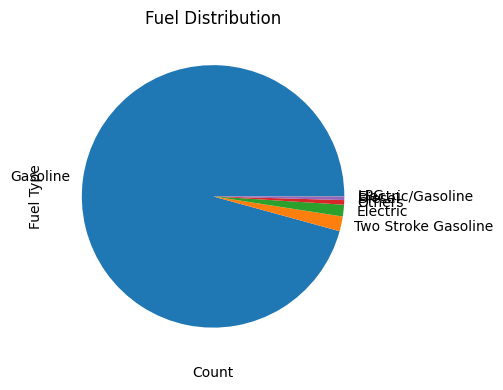

In [36]:
dataset['fuel'].value_counts().sort_values(ascending=False).plot(kind='pie', figsize=(6,4), color = ['red', 'blue'])
plt.title('Fuel Distribution')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()

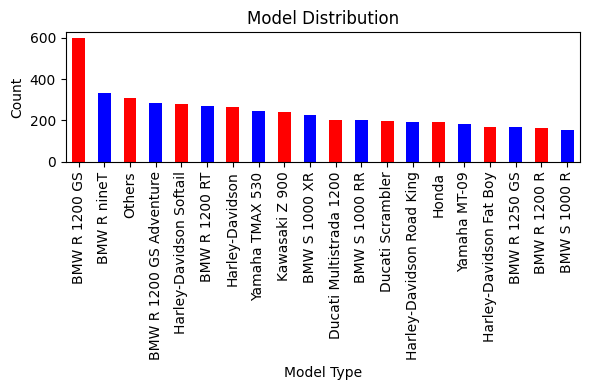

In [21]:
dataset['make_model'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(6,4), color = ['red', 'blue'])
plt.title('Model Distribution')
plt.xlabel('Model Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

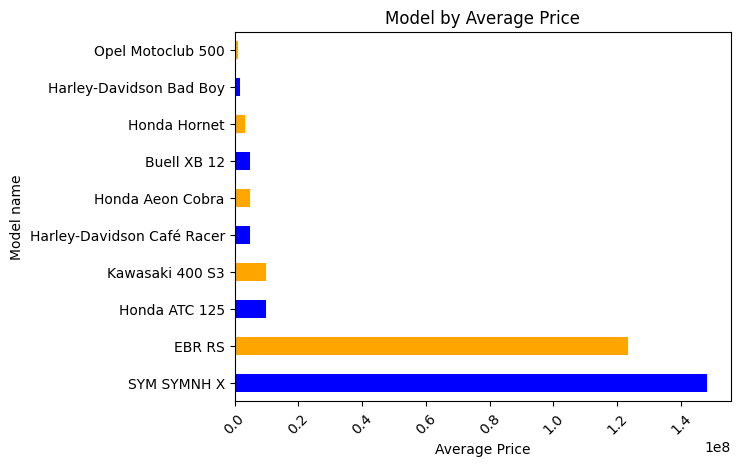

In [37]:
counts = dataset.groupby('make_model')['price'].mean().sort_values(ascending=False).head(10).plot(kind='barh', color= ['blue', 'orange'])
plt.title('Model by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Model name')
plt.xticks(rotation=45)
plt.show()

In [38]:
dataset = dataset[['mileage', 'make_model', 'fuel', 'price']]
dataset.head()

,mileage,make_model,fuel,price
0,150,Honda,Gasoline,23990
1,2871,BMW F 800 GT,Gasoline,7500
2,1700,Nova Motors Retro Star,Gasoline,800
3,24345,Aprilia RSV4,Gasoline,14990
4,25000,Kawasaki Ninja ZX-6R,Gasoline,6200


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cat_col = dataset[['make_model', 'fuel']]
for col in cat_col:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head(2)

,mileage,make_model,fuel,price
0,150,702,3,23990
1,2871,136,3,7500


In [41]:
corr = dataset.corr()
corr

,mileage,make_model,fuel,price
mileage,1.000000,-0.012821,-0.020372,0.022284
make_model,-0.012821,1.000000,0.008202,0.004989
fuel,-0.020372,0.008202,1.000000,-0.001126
price,0.022284,0.004989,-0.001126,1.000000


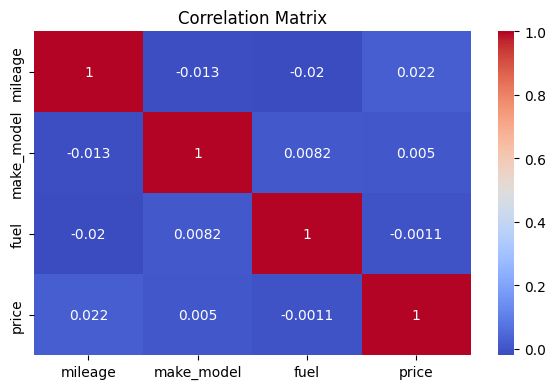

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
x = dataset.drop(['price'], axis = 1)
y = dataset['price']
x
y

0        23990
1         7500
2          800
3        14990
4         6200
         ...  
34910     8450
34911    36500
34913     8500
34915     8350
34916     8500
Name: price, Length: 25700, dtype: int64

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 55159.42918168536
RMSE: 4156854148046.122
R2: -0.3840849803401527


In [53]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)

y_pred = dtr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("\n\n")

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 29587.210702764594
RMSE: 2984645496130.2544
R2: 0.006218920436384501



MAE: 78400.5999141989
RMSE: 2983634811647.524
R2: 0.006555442518369925


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],   # regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, n_jobs=-1)
grid_ridge.fit(x_train, y_train)

# Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000]
}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, n_jobs=-1)
grid_lasso.fit(x_train, y_train)

# ElasticNet
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9],   # balance between Lasso & Ridge
    'max_iter': [1000, 5000]
}
grid_en = GridSearchCV(ElasticNet(), param_grid_en, cv=5, n_jobs=-1)
grid_en.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = grid_en.predict(x_test)

print("Best Params:", grid_en.best_params_)
print("Best CV Score:", grid_en.best_score_)   # Default is R² for regressors
print("R² Score (Test):", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

Best Params: {'alpha': 10, 'l1_ratio': 0.5, 'max_iter': 1000}
Best CV Score: -2.7122347033465593
R² Score (Test): 0.0016683008002543742
MAE: 79708.83229048058
RMSE: 2998312476394.702


In [57]:
y_pred = rfr_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[ 8385.505      11900.        ]
 [10098.35       10062.        ]
 [ 8074.21        6999.        ]
 ...
 [10101.73333333 10200.        ]
 [ 9086.95        7500.        ]
 [ 8347.70571429  7900.        ]]


In [59]:
x.sample(5)

,mileage,make_model,fuel
26239,27552,1819,3
8702,27500,709,3
707,8800,692,3
32481,25500,1474,3
34506,16500,640,3


In [60]:
y.iloc[707]

9590

In [61]:
user_input = [[8800, 692, 3]]
results = dtr_model.predict(user_input)[0]
print(f"Accuracy: {results:.2f}")

Accuracy: 6000.00
